### : dlib를 사용하기 위한 준비
##### 0. 전체 코드 : https://github.com/kairess/simple_face_recognition <- 이것을 기반으로 
##### 1. cmake 설치 및 환경설정 : https://jintan.tistory.com/49
##### 2. cmake를 사용하기 위한 비주얼스튜디오 설치 및 설정 : https://codedragon.tistory.com/8901
##### 3. 아나콘다 콘솔창(관리자 권한) : pip install dlib 

##### dlib -  C ++로 복잡한 소프트웨어를 작성하기위한 기계 학습 알고리즘 및 도구를 포함하는 최신 C ++ 툴킷
##### 자세한 설명 - http://dlib.net/
##### dlib 함수 설명 - dlib.net/python/index.html

In [1]:
import dlib, cv2 
#dlib 패키지-이미지인식(Face Recognition) :훈련용 사진으로 새로운 사진에서 얼굴을 인식 
#추적(Face Tracking)- 탐지된 얼굴을 추적 따라다님 - 동영상 에서 Detection 하면서 추적 
#탐지(Face Detection)- 얼굴을 탐지 - 한 이미지에서 얼굴 위치가 어딘지 탐지
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

detector = dlib.get_frontal_face_detector() # 얼굴탐지모델

# __call__(self: dlib.shape_predictor, image: array, box: dlib.rectangle) → dlib.full_object_detection
sp = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat') # 얼굴 랜드마크 탐지 모델(눈,코,입 등 중요부위)


facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat') # 얼굴 인식 모델

In [2]:
# 얼굴을 찾는 함수
def find_faces(img): # RGB img 
    dets = detector(img, 1) # 얼굴 탐지 

    if len(dets) == 0: # 얼굴 못찾으면 빈 배열로 반환 
        return np.empty(0), np.empty(0), np.empty(0)
    
    # rects : 얼굴 사각형 좌표
    # shapes : 얼굴 랜드마크 좌표
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int) # len(dets),68,2 만큼 array 생성, 0값으로
    for k, d in enumerate(dets): # 얼굴의 개수만큼 for문 작동 , enumerate() : 인덱스랑 같이 리턴 
        rect = ((d.left(), d.top()), (d.right(), d.bottom())) # 얼굴을 기준으로 사각형 좌표
        rects.append(rect)

        shape = sp(img, d) 
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

# 얼굴을 인코딩하는 함수
# img를 128개의 vector로 만들어서 target인지 아닌지 판단하기 위한 과정
def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)


# Compute Saved Face Descriptions

In [4]:
img_paths = { # 사람 추가 부분
    'Armas': 'img1/Armas.jpg',
    'Craig': 'img1/craig.jpg',
    'Evans': 'img1/evans.jpg',
    'Martell': 'img1/Martell.jpg',
    'Plummer': 'img1/Plummer.jpg',
    'Shannon': 'img1/shannon.jpg'
}

descs_knives = {
    'Armas': None,
    'Craig': None,
    'Evans': None,
    'Martell': None,
    'Plummer': None,
    'Shannon': None
}
# 훈련용 데이터를 encoding 하여 npy형식으로 저장
for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb) # 얼굴 랜드마크
    
    descs_knives[name] = encode_faces(img_rgb, img_shapes)[0] 
    #encode_faces 함수에 전체 이미지와 각 사람의 랜드마크를 넣어줌

np.save('img1/descs_knives.npy', descs_knives)
print(descs_knives) # 각 사람의 얼굴은 이렇게 생겼다.

{'Armas': array([-0.20996356,  0.05457548,  0.10694072, -0.11273089, -0.14766115,
        0.02764712, -0.07341108, -0.13766676,  0.17121871, -0.06422973,
        0.17104866,  0.01736926, -0.15840378,  0.06073766, -0.06095093,
        0.19032787, -0.15925978, -0.18702425, -0.07195851, -0.00805862,
       -0.07747487,  0.04872883,  0.06444222,  0.07628063, -0.13866639,
       -0.30399805, -0.10398086, -0.09940773, -0.07795915, -0.01746175,
        0.03421402,  0.08523256, -0.19409418, -0.00542966,  0.01391268,
        0.09232721, -0.0153337 , -0.12239892,  0.18302256,  0.01805349,
       -0.24556053, -0.03332207,  0.09132076,  0.266444  ,  0.22327571,
       -0.04585724,  0.03450075, -0.02203649,  0.13697611, -0.33515203,
        0.10212897,  0.12800747,  0.0444106 ,  0.08386108,  0.06820285,
       -0.07586911,  0.10060019,  0.11292684, -0.1368528 ,  0.05619202,
        0.07901167, -0.07035895,  0.09476122, -0.06458899,  0.26218468,
        0.1926631 , -0.09096196, -0.11624013,  0.10550

# Compute Input

In [5]:
img_bgr = cv2.imread('img1/test.jpg') # test용 사진
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

# Visualize Output

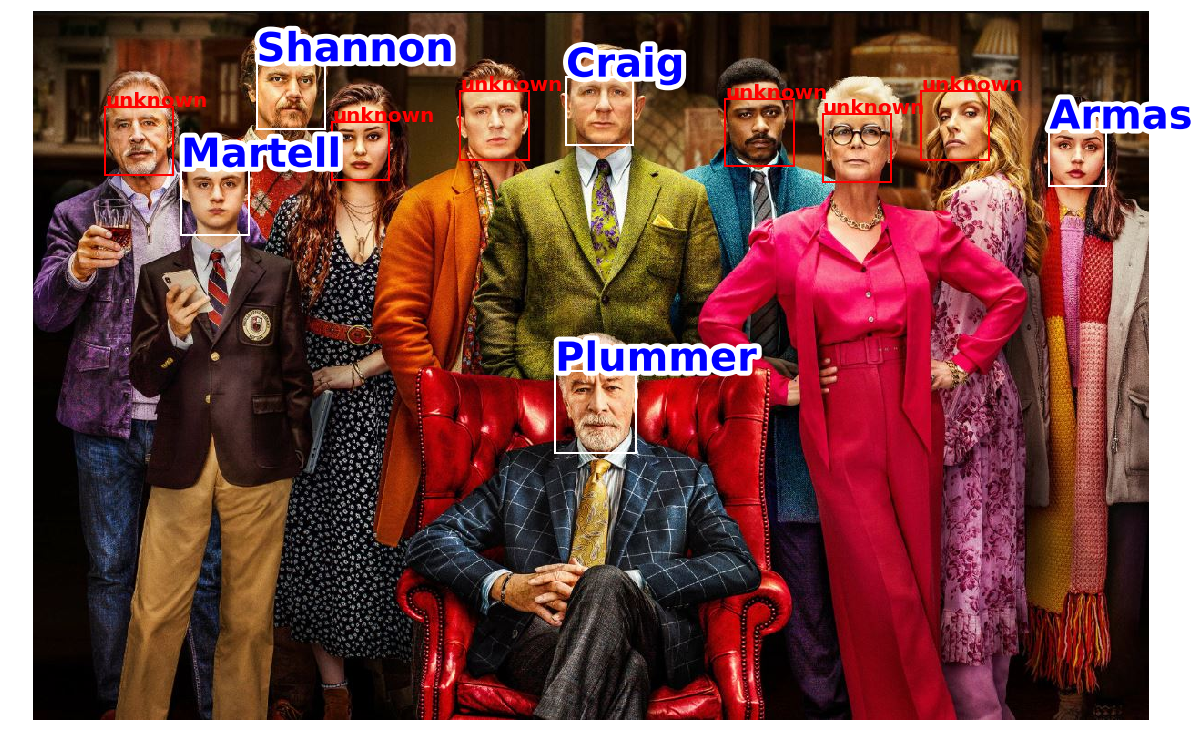

In [6]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs_knives.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1) # 유클리드 거리로 어떤 사람얼굴인지 계산

        if dist < 0.6: # 각 사람 얼굴 좌표를0.6으로 기준으로 판단
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
           
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output.png')
plt.show()

#### 비교할 영상은 따로 다운 받으셔야 합니다.

In [7]:
import dlib, cv2
import numpy as np

detector = dlib.get_frontal_face_detector() #얼굴 인식용 클래스 생성(기본 제공되는 얼굴 인식 모델 사용)
sp = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')#shape_predictor모델 호출
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')#face인식 모델 호출

descs = np.load('img1/descs_knives.npy')[()] #얼굴데이터 벡터파일 

def encode_face(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0)

    for k, d in enumerate(dets):
        shape = sp(img, d)
        face_descriptor = facerec.compute_face_descriptor(img, shape)

        return np.array(face_descriptor)

video_path = 'img1/Knives_Out_720p.mp4'
cap = cv2.VideoCapture(video_path) #디렉토리에 있는 동영상파일

if not cap.isOpened():
    exit()

_, img_bgr = cap.read() # (800, 1920, 3)
padding_size = 0
resized_width = 1920
video_size = (resized_width, int(img_bgr.shape[0] * resized_width // img_bgr.shape[1]))
output_size = (resized_width, int(img_bgr.shape[0] * resized_width // img_bgr.shape[1] + padding_size * 2))

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') #비디오 코덱지정
writer = cv2.VideoWriter('%s_output.mp4' % (video_path.split('.')[0]), fourcc, cap.get(cv2.CAP_PROP_FPS), output_size)

while True:
    ret, img_bgr = cap.read()
    if not ret:
        break

    img_bgr = cv2.resize(img_bgr, video_size)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # img_bgr = cv2.copyMakeBorder(img_bgr, top=padding_size, bottom=padding_size, left=0, right=0, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  
    dets = detector(img_bgr, 1) #얼굴 탐지, 1은 업샘플링을 한번 하겠다는 의미. 업샘플링을 하면 더 정확하게 인식할 수 있지만, 
                                #값이 커질수록 더 많은 메모리를 잡아 먹음
    
    
    for k, d in enumerate(dets): #인식된 얼굴의 개수만큼 반복하여 얼굴 윤곽 표시. k =얼굴 인덱스 d=얼굴좌표
        shape = sp(img_rgb, d) #인식된 좌표(박스)에서 랜드마크 추출
                            #shape는 full object detection 클래스이다.
        
        face_descriptor = facerec.compute_face_descriptor(img_rgb, shape) #유클리디언 계산

        last_found = {'name': 'unknown', 'dist': 0.6, 'color': (0,0,255)} # 디폴트값이 unknown

        for name, saved_desc in descs.items(): 
            dist = np.linalg.norm([face_descriptor] - saved_desc, axis=1) #face_des 와 saved_des 사이 거리를 구함

            if dist < last_found['dist']: #만약에 거리가 짧으면
                last_found = {'name': name, 'dist': dist, 'color': (255,255,255)} #detect한 배우 이름값 last_found에 저장

        cv2.rectangle(img_bgr, pt1=(d.left(), d.top()), pt2=(d.right(), d.bottom()), color=last_found['color'], thickness=2) #사각형 박스 그리기
        cv2.putText(img_bgr, last_found['name'], org=(d.left(), d.top()), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=last_found['color'], thickness=2)
        #문자 출력함수
    writer.write(img_bgr)

    cv2.imshow('img', img_bgr)
    if cv2.waitKey(1) == 27:
        break

cap.release()
writer.release()
cv2.destroyAllWindows()